In [206]:
#Setup conections to repo
import geopandas as gpd
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/tl_2020_19_bg.zip"
IA_TRACTS = gpd.read_file(url)
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/DECENNIALDHC2020.H3_2025-12-10T220427/DECENNIALDHC2020.H3-Data.csv"
IA_DATA= gpd.read_file(url)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,..."
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195..."
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008..."
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512..."
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590..."


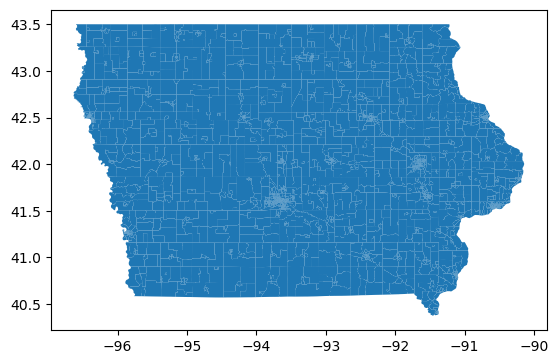

In [207]:
IA_TRACTS.plot()
IA_TRACTS.head()

In [166]:
IA_DATA.head()

,GEO_ID,NAME,H3_001N,H3_002N,H3_003N,field_6
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant,
1,1500000US190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92,
2,1500000US190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20,
3,1500000US190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35,
4,1500000US190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22,


In [208]:
#Drop original column  names. Rename the column names
IA_DATA = IA_DATA.iloc[1:].reset_index(drop=True)
IA_DATA = IA_DATA.iloc[:, :5]
IA_DATA.columns = ["Geography","Geographic Area Name",	"Total",	"Occupied",	"Vacant"]
IA_DATA.columns

Index(['Geography', 'Geographic Area Name', 'Total', 'Occupied', 'Vacant'], dtype='object')

In [209]:
#Trim/replace the first part of the string 
IA_DATA["Geography"] = IA_DATA["Geography"].str.replace("1500000US", "", regex=False)
IA_DATA.head()

,Geography,Geographic Area Name,Total,Occupied,Vacant
0,190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92
1,190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20
2,190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35
3,190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22
4,190019602002,Block Group 2; Census Tract 9602; Adair County...,543,468,75


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30


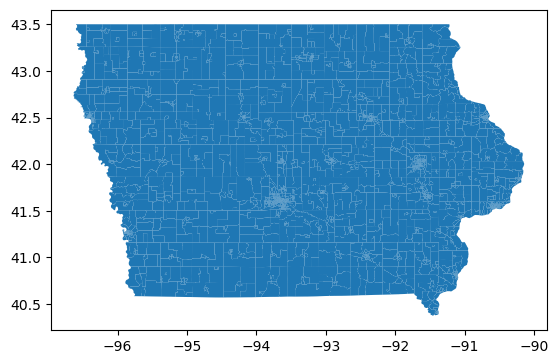

In [210]:
IA_MERGED = IA_TRACTS.merge(IA_DATA, left_on="GEOID", right_on="Geography", how="inner")
IA_MERGED.plot()
IA_MERGED.head()

In [213]:

#calculate percentage vacant
import numpy as np
import pandas as pd

IA_MERGED["Vacant"] = pd.to_numeric(IA_MERGED["Vacant"], errors="coerce")
IA_MERGED["Total"]  = pd.to_numeric(IA_MERGED["Total"], errors="coerce")

IA_MERGED["PCT_VACANT"] = IA_MERGED["Vacant"] / IA_MERGED["Total"] * 100

IA_MERGED["PCT_VACANT"] = IA_MERGED["PCT_VACANT"].fillna(0)

In [215]:
IA_MERGED.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213


<Axes: >

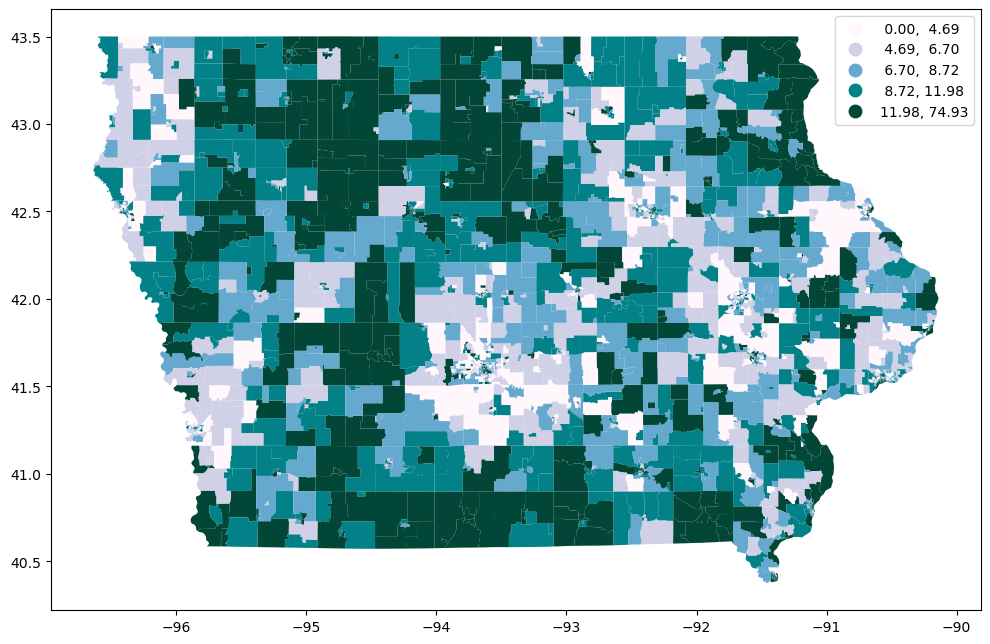

In [216]:
IA_MERGED.plot(
    "PCT_VACANT",
    scheme="quantiles",
    cmap="PuBuGn",
    legend=True,figsize=(12, 10))

In [217]:
from libpysal.graph import Graph
from numpy.random import seed
seed(1)
IA_MERGED_perim=Graph.build_contiguity(IA_MERGED,by_perimeter=True)

In [218]:
#build matrix
IA_MERGED_perim=IA_MERGED_perim.transform("r")

In [219]:
# get spatial lag of PCT_VACANT
ylag = IA_MERGED_perim.lag(IA_MERGED["PCT_VACANT"])

In [220]:
IA_MERGED=IA_MERGED.assign(PCT_VACANT_lagged=ylag)
IA_MERGED.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT,PCT_VACANT_lagged
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128,13.244094
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258,13.945636
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502,8.322379
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832,8.317510
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213,6.286213


<Axes: xlabel='PCT_VACANT', ylabel='PCT_VACANT_lagged'>

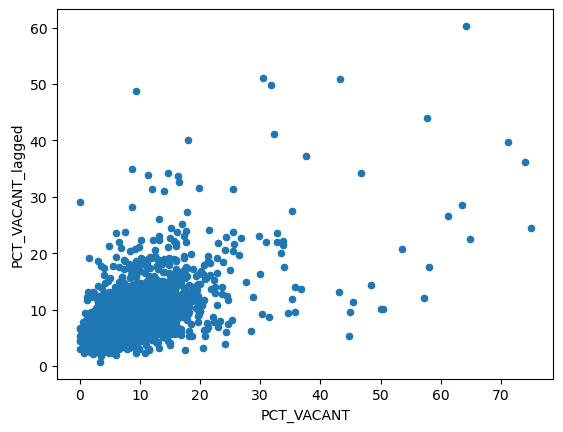

In [221]:
IA_MERGED.plot.scatter("PCT_VACANT","PCT_VACANT_lagged")

OOf.

<Axes: >

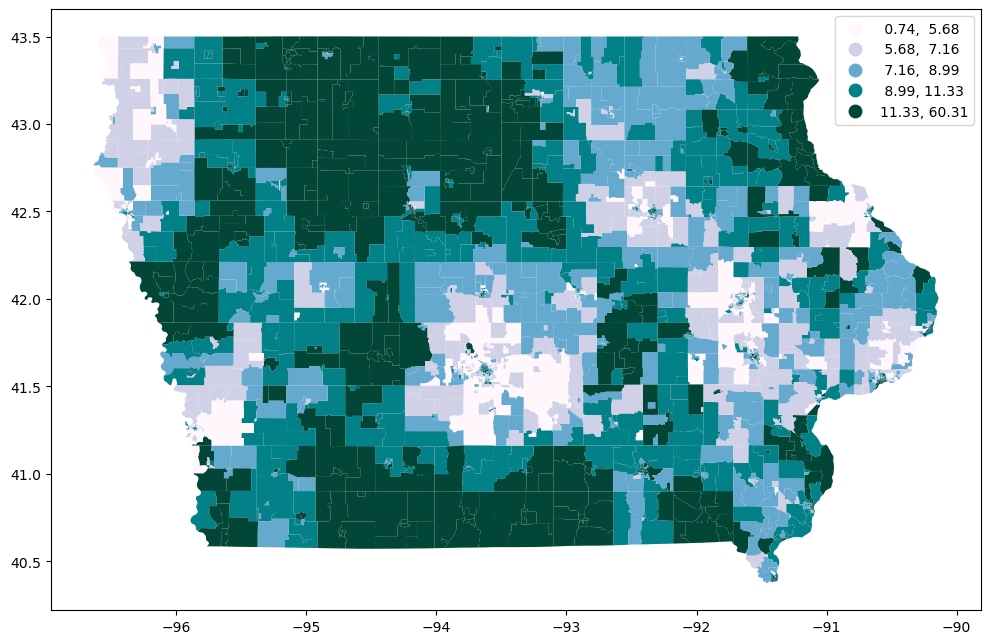

In [222]:
IA_MERGED.plot(
    "PCT_VACANT_lagged",
    scheme="quantiles",
    cmap="PuBuGn",
    legend=True,figsize=(12, 10))

In [223]:
import esda # from pysal

MoranGlobal_Housing = esda.Moran(IA_MERGED['PCT_VACANT'], IA_MERGED_perim)
MoranGlobal_Housing.I,MoranGlobal_Housing.p_sim

(np.float64(0.41807855968597957), np.float64(0.001))

<Axes: >

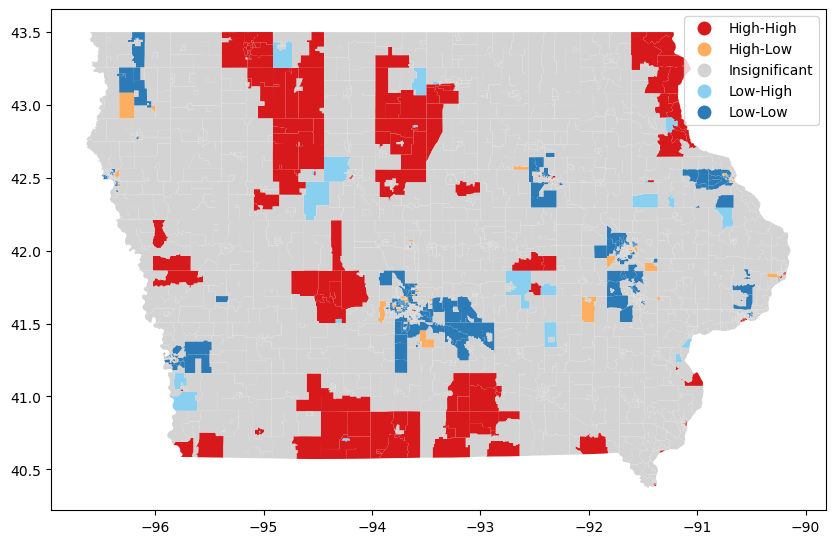

In [225]:
lisa = esda.Moran_Local(IA_MERGED['PCT_VACANT'], IA_MERGED_perim)
lisa.plot(IA_MERGED,crit_value=0.05,figsize=(10,13),legend=True)